In [1]:
import os
from glob import glob

import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline


In [6]:
data_paths = tf.io.matching_files('fastcampus/dataset/mnist_png/training/*/*.png')
# globe 쓰던 matching을 쓰던 상관없음


In [5]:
path = data_paths[0]
path
# tf.로 불러오면 텐서형태로 가져옴

<tf.Tensor: id=8, shape=(), dtype=string, numpy=b'fastcampus\\dataset\\mnist_png\\training\\0\\1.png'>

## Load Image

In [7]:
gfile = tf.io.read_file(path)
image = tf.io.decode_image(gfile)

In [8]:
image.shape

TensorShape([28, 28, 1])

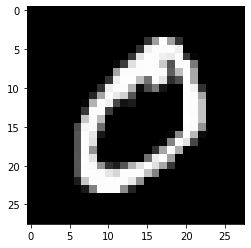

In [10]:
plt.imshow(image[:,:,0], 'gray')
plt.show()

## Set Data Generator

### 데이터 전처리하는데 사용할 수 있음. (위 0과 아래 0 비교)

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
inputs = image[tf.newaxis, ...]

In [13]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

# ex) 고양이가 뒤집어져있으면 컴퓨터가 알아볼 수 있는가?
# 회전, 대칭이동과같이 데이터 전처리가 가해져도 학습이 가능해야하므로, 이러한 데이터 전처리과정을 쓰게됨

In [15]:
inputs.shape

TensorShape([1, 28, 28, 1])

0.0 253.84695 39.66316


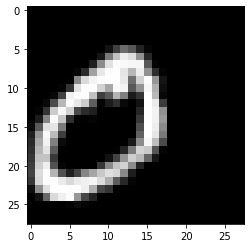

In [16]:
result = next(iter(datagen.flow(inputs)))

print(np.min(result), np.max(result), np.mean(result))

plt.imshow(result[0, :, :, 0], 'gray')
plt.show()

## Transformation

- width_shift_range  
- height_shift_range  
  
- brightness_range  
- zoom_range  
  
- horizontal_flip  
- vertical_flip  
  
- rescale  
  
- preprocessing_function 

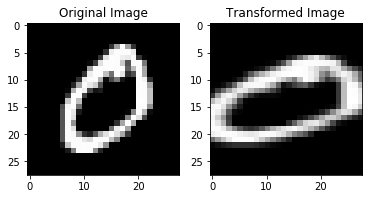

In [32]:
datagen = ImageDataGenerator(
    zoom_range=0.8, # 위 아래 좌우 랜덤
    width_shift_range=0.1 # 방향 랜덤이라 돌릴때마다 바뀜
)

result = next(iter(datagen.flow(inputs)))

plt.subplot(121)
plt.title("Original Image")
plt.imshow(inputs[0, :, :, 0], 'gray')
plt.subplot(122)
plt.title("Transformed Image")
plt.imshow(result[0, :, :, 0], 'gray')
plt.show()

## Rescale시 주의사항

In [34]:
train_datagen = ImageDataGenerator(
    zoom_range=0.7,
    rescale=1./255.
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

# 한쪽에 스케일을 해주면, 다른쪽에도 동일하게 처리해줘야함.